In [11]:
%matplotlib widget
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_excel('data/data.xlsx', sheet_name = '1st Trial', names = ['time (min)', 'm_xylene', 'NO', 'NO2', 'NOx', 'NOx/m_xy', 'beta', 'NO,NO2 crossing time (min)', 'Wall loss factor', 'Peak O3 Concentration', '50% of Final M0 Time', 'PeakDp', 'deltaHC', 'm_xy consume ratio', 'deltaHC / beta', 'deltaHC * beta', 'M0', 'yield'])


In [12]:
X = data.iloc[:, :-2]
y = data.iloc[:, -2:]

# PCA 3D

In [6]:
n_components = 3
pca = PCA(n_components = n_components)
X_pca = pca.fit_transform(X)

ratio = pca.explained_variance_ratio_
f'Percent of Variance Captured by {n_components} Principal Components: {ratio.sum():.2%}'

'Percent of Variance Captured by 3 Principal Components: 98.17%'

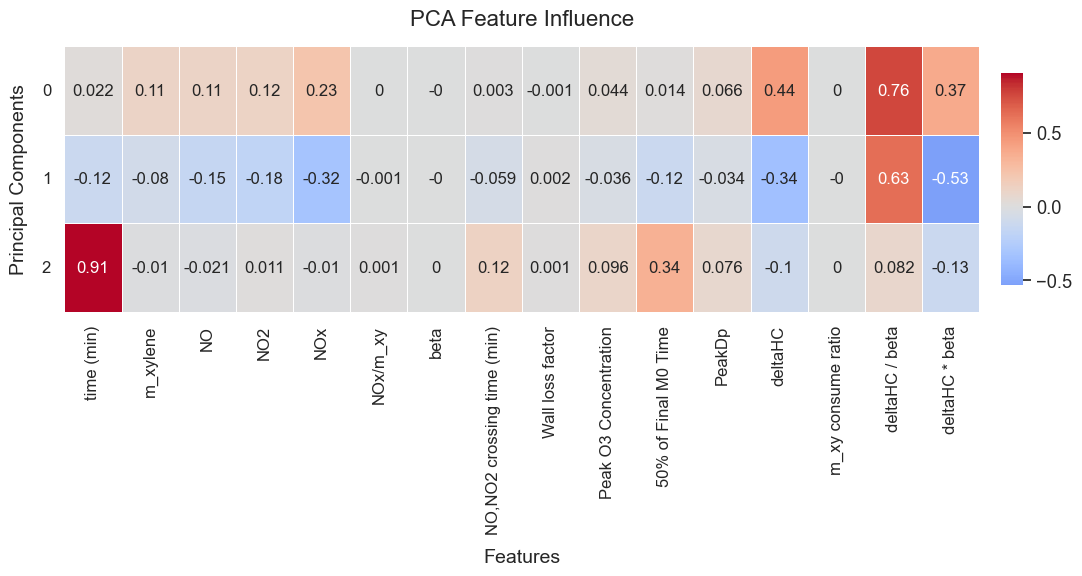

In [8]:
loadings = pca.components_
loadings = np.round(pd.DataFrame(loadings, columns = X.columns), 3)
plt.figure(figsize = (12, 6))
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')
ax = sns.heatmap(loadings, annot = True, cmap = 'coolwarm', center = 0, linewidths = 0.5,
            cbar_kws = {'shrink': 0.8, 'aspect': 10, 'pad': 0.02},
            annot_kws = {'fontsize': 12})

ax.tick_params(axis = 'both', labelsize = 12)
ax.set_title('PCA Feature Influence', fontsize = 16, pad = 15)
ax.set_xlabel('Features', fontsize = 14, labelpad = 10)
ax.set_ylabel('Principal Components', fontsize = 14, labelpad = 10)

ax.yaxis.set_ticklabels(ax.yaxis.get_ticklabels(), rotation=0, ha='right')

plt.tight_layout()
plt.show()

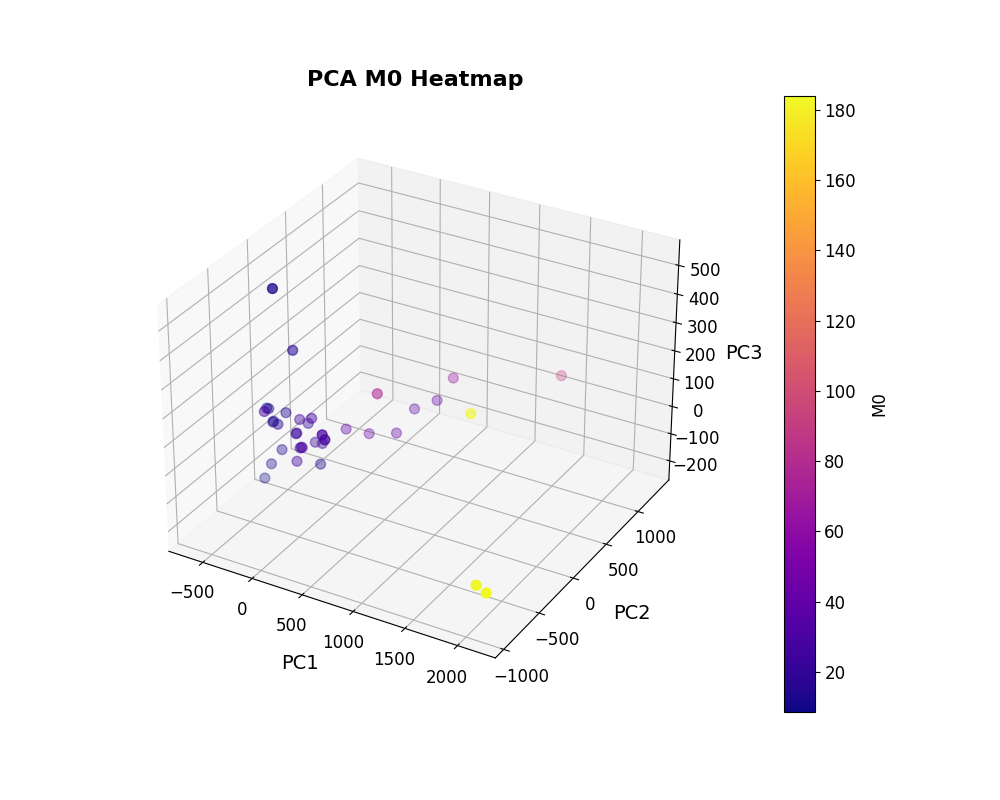

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c = data['M0'], cmap='plasma', s=50)

# Customize plot elements
ax.set_title("PCA M0 Heatmap", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("PC1", fontsize=14, labelpad=10)
ax.set_ylabel("PC2", fontsize=14, labelpad=10)
ax.set_zlabel("PC3", fontsize=14, labelpad=10)
ax.tick_params(axis='both', labelsize=12)

# Add colorbar with a small gap between the plot and the colorbar
cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("M0", fontsize=12, labelpad=10)
cbar.ax.tick_params(labelsize=12)

# Show the plot
plt.show()

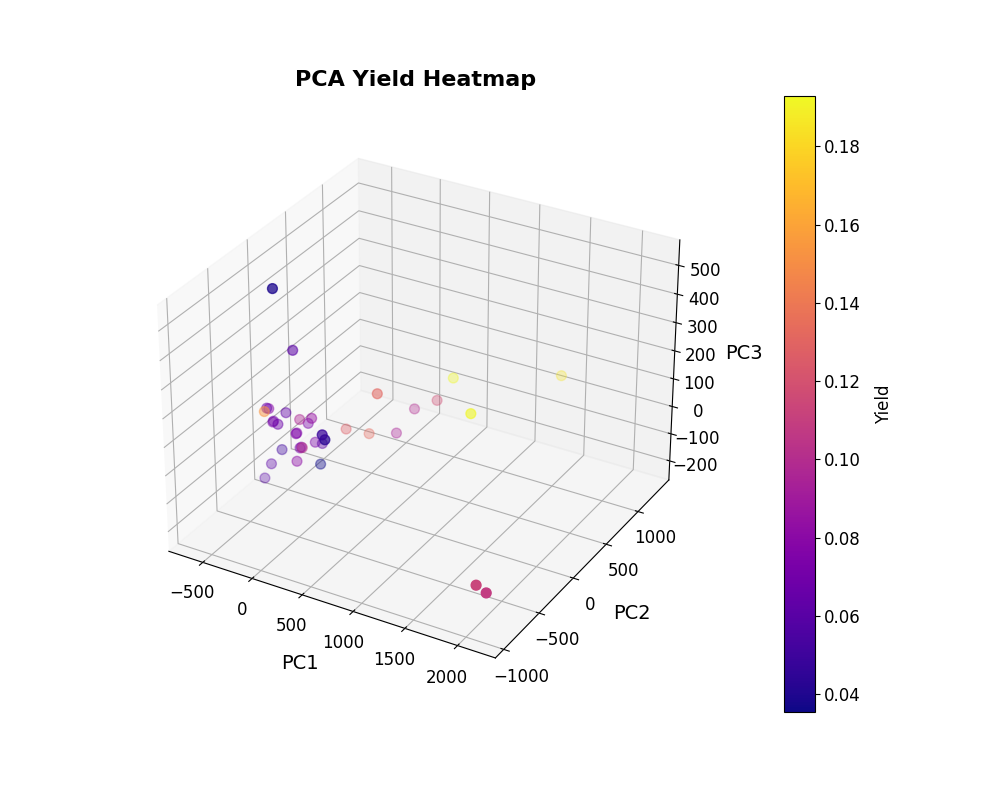

In [14]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c = data['yield'], cmap='plasma', s=50)

# Customize plot elements
ax.set_title("PCA Yield Heatmap", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("PC1", fontsize=14, labelpad=10)
ax.set_ylabel("PC2", fontsize=14, labelpad=10)
ax.set_zlabel("PC3", fontsize=14, labelpad=10)
ax.tick_params(axis='both', labelsize=12)

# Add colorbar with a small gap between the plot and the colorbar
cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Yield", fontsize=12, labelpad=10)
cbar.ax.tick_params(labelsize=12)

# Show the plot
plt.show()

# t-SNE 3D

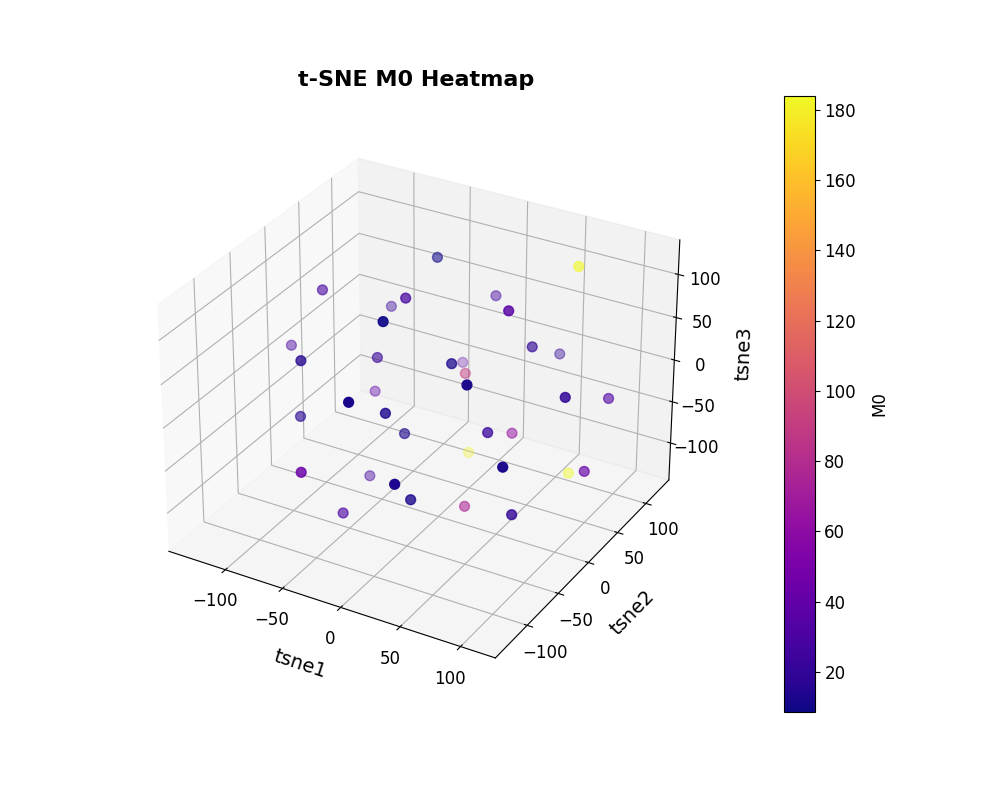

In [15]:
tsne = TSNE(n_components = 3, random_state = 15)
X_tsne = tsne.fit_transform(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
sc = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c = data['M0'], cmap='plasma', s=50)

# Customize plot elements
ax.set_title("t-SNE M0 Heatmap", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("tsne1", fontsize=14, labelpad=10)
ax.set_ylabel("tsne2", fontsize=14, labelpad=10)
ax.set_zlabel("tsne3", fontsize=14, labelpad=10)
ax.tick_params(axis='both', labelsize=12)

# Add colorbar with a small gap between the plot and the colorbar
cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("M0", fontsize=12, labelpad=10)
cbar.ax.tick_params(labelsize=12)

# Show the plot
plt.show()

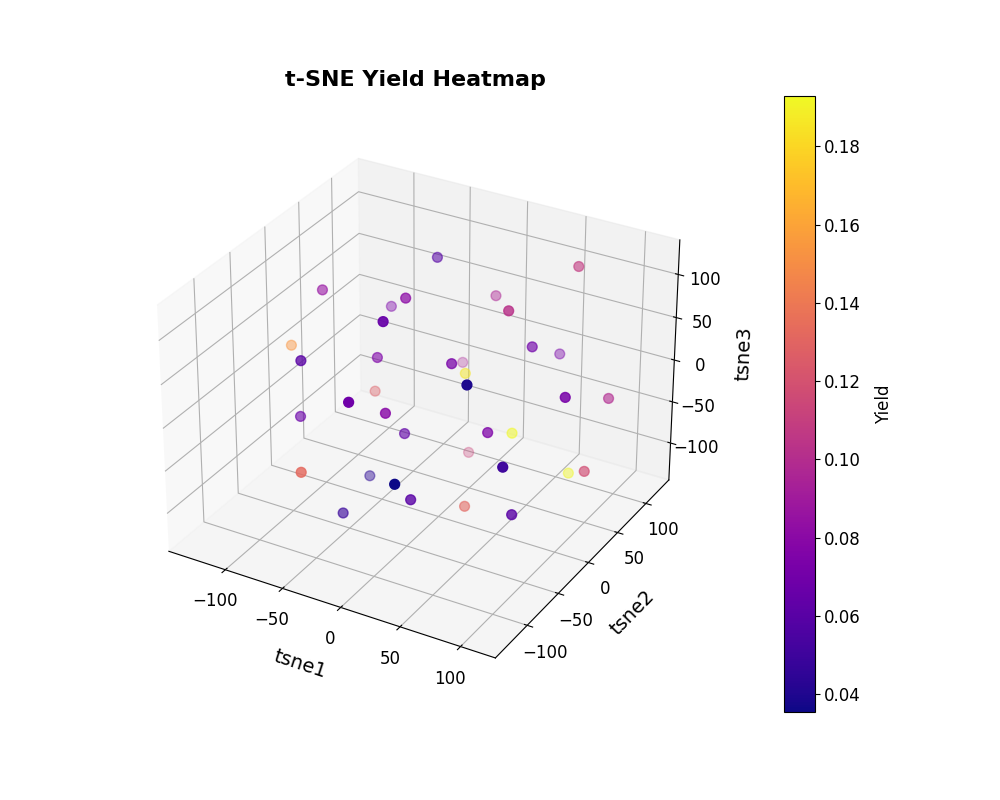

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
sc = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c = data['yield'], cmap='plasma', s=50)

# Customize plot elements
ax.set_title("t-SNE Yield Heatmap", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("tsne1", fontsize=14, labelpad=10)
ax.set_ylabel("tsne2", fontsize=14, labelpad=10)
ax.set_zlabel("tsne3", fontsize=14, labelpad=10)
ax.tick_params(axis='both', labelsize=12)

# Add colorbar with a small gap between the plot and the colorbar
cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Yield", fontsize=12, labelpad=10)
cbar.ax.tick_params(labelsize=12)

# Show the plot
plt.show()